## Create a K-means clustering algorithm to group customers of a retail store based on their purchase history

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [3]:
#load data
data = pd.read_csv(r"C:\Users\ritik\Downloads\Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
data.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

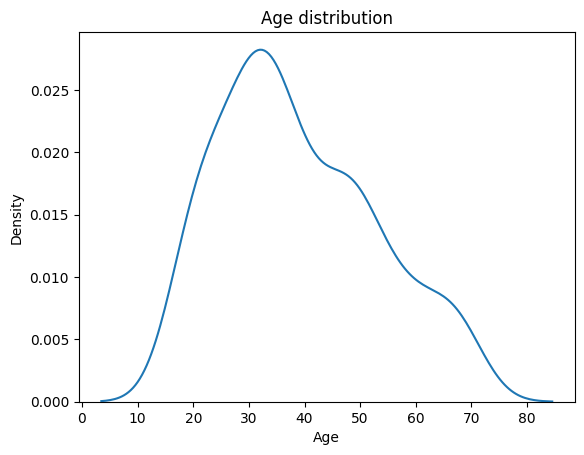

In [5]:
#distribution of age
sns.kdeplot(data["Age"])
plt.title("Age distribution")
plt.show()

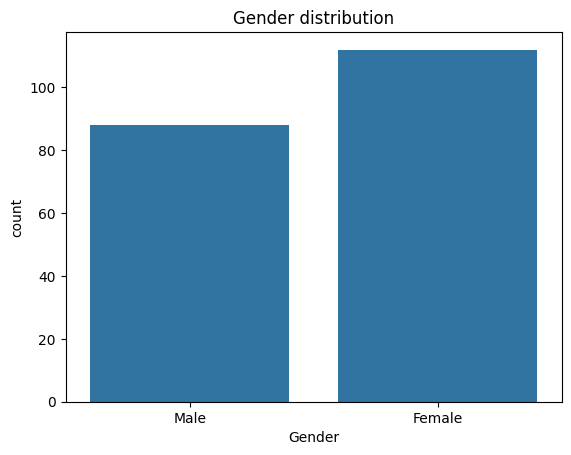

In [5]:
#Distribution of gender
sns.countplot(x = "Gender" , data=data)
plt.title("Gender distribution")
plt.show()

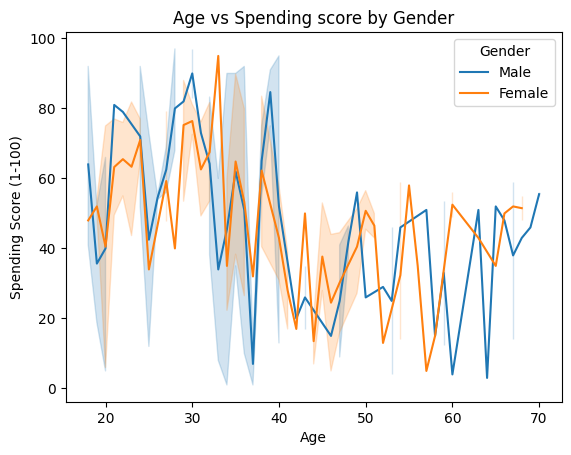

In [6]:
#Distribution of Age vs Spending score using gender
sns.lineplot(x= "Age" , y ="Spending Score (1-100)" , hue="Gender" , data= data)
plt.title("Age vs Spending score by Gender")
plt.show()  

In [7]:
#select features for clustering
k = data[["Age" , "Annual Income (k$)" ,"Spending Score (1-100)"]]

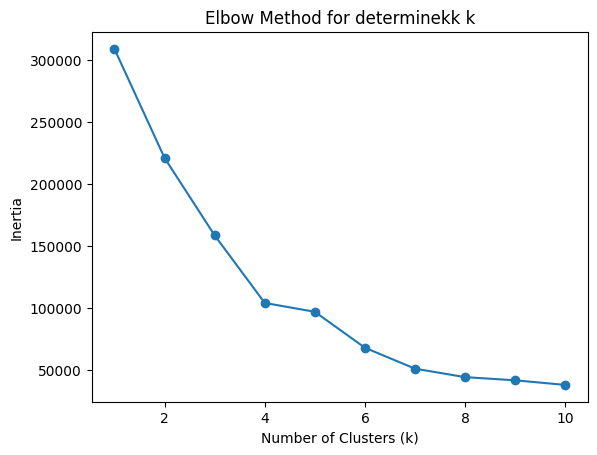

In [21]:
#determine the no of clusters (k) using Elbow method
inertia = []
for i in range(1,11):
    Kmeans=  KMeans(n_clusters=i , random_state=42)
    Kmeans.fit(k)
    inertia.append(Kmeans.inertia_)

#visualize Elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for determinekk k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [22]:
#apply clustering 
Kmeans_model = KMeans(n_clusters = 6 ,random_state = 42)
y_kmeans = Kmeans_model.fit_predict(k)

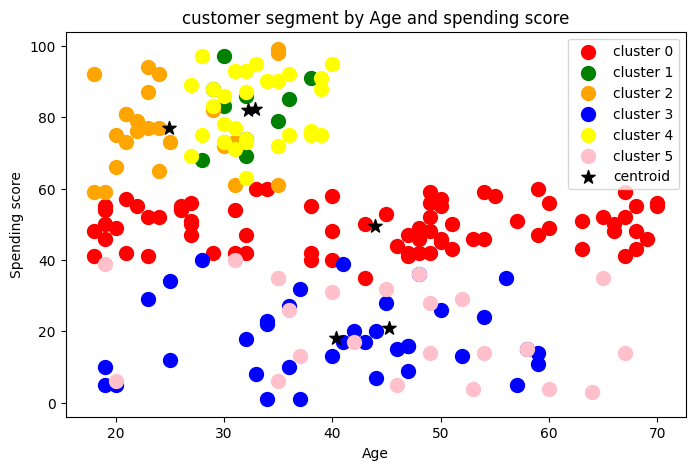

In [27]:
centroid = Kmeans_model.cluster_centers_
plt.figure(figsize=(8,5))
colors = ["red" , "green" , "orange" , "blue" ,"yellow" ,"pink"]
for i in range(6):
    plt.scatter(k["Age"][y_kmeans==i] , k["Spending Score (1-100)"][y_kmeans==i] , s =100 , c =colors[i] , label = f"cluster {i}")
plt.scatter(centroid[:,0] , centroid[:,2] , s =100 , c="black" , label ="centroid" , marker= "*")
plt.title("customer segment by Age and spending score")
plt.xlabel("Age")
plt.ylabel("Spending score")
plt.legend()
plt.show()

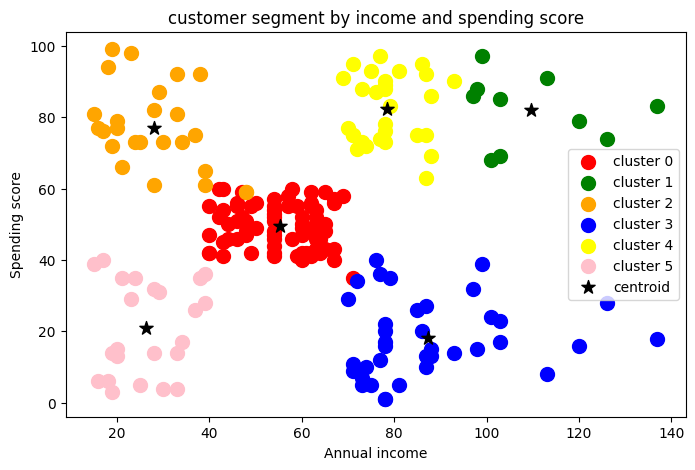

In [28]:

plt.figure(figsize=(8,5))
colors = ["red" , "green" , "orange" , "blue" ,"yellow" ,"pink"]
for i in range(6):
    plt.scatter(k["Annual Income (k$)"][y_kmeans==i] , k["Spending Score (1-100)"][y_kmeans==i] , s =100 , c =colors[i] , label = f"cluster {i}")
plt.scatter(centroid[:,1] , centroid[:,2] , s =100 , c="black" , label ="centroid" , marker= "*")
plt.title("customer segment by income and spending score")
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.legend()
plt.show()